#Ventilator Pressure Prediction



#**Introduction**
Mechanical ventilation is a life-saving intervention used in critical care settings to assist patients who are unable to breathe on their own. It involves using a machine to deliver air into the lungs, which can help maintain oxygen levels and remove carbon dioxide. However, improper mechanical ventilation can lead to complications such as barotrauma, volutrauma, and ventilator-induced lung injury (VILI), which can be detrimental to patient health.

To reduce the risk of VILI, clinicians rely on ventilator pressure readings to adjust the settings of the machine. However, the accuracy of these pressure readings can be influenced by various factors, such as patient-ventilator asynchrony, air leaks, and circuit compliance. Therefore, accurately predicting ventilator pressure is crucial for optimizing ventilator settings and improving patient outcomes.

**Ventilator Pressure Prediction** project has a dataset that consists of time data of ventilator readings and patient parameters. The dataset contains 8 columns, which will be described in detail below. The task for the competition is to predict the mean airway pressure of a patient undergoing mechanical ventilation based on the provided data.


# **Description of Columns:**
**Train Dataset has 8 columns and Test dataset has 7 columns**

**id :** A unique identifier for each row in the dataset.

**breath_id :** A unique identifier for each breath within a single patient. This allows for the tracking of the individual breaths over time.

**R :** Airway resistance, measured in cmH2O/L/sec. This measures the resistance to airflow in the airways.

**C :** Respiratory compliance, measured in mL/cmH2O. This measures the ease with which the lungs can expand.

**time_step :** The time step, in seconds, at which the measurement was taken.

**u_in :** The flow of air into the lungs during inspiration, measured in L/min.

**u_out :** The flow of air out of the lungs during expiration, measured in L/min.

**pressure :** The airway pressure, measured in cmH2O. This measures the pressure required to maintain airflow in the airways.

## **Limitations of the Dataset:**

Limitations of this dataset has the fact that it contains data from a single type of ventilator and from patients with a limited range of respiratory conditions. 

Additionally, the dataset does not include information about other important clinical variables, such as blood gas measurements and patient demographics, which could impact the accuracy of the predictive models. 

Therefore, it is important to acknowledge the potential limitations of this dataset and to use caution when interpreting the results of any machine learning models developed using this data.

##Importing Libraries

In [ ]:
# Importing the necessary libraries

# NumPy is a library for numerical computations
import numpy as np

# Pandas is a library for data manipulation and analysis
import pandas as pd

# Seaborn and Matplotlib are libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly library for interactive plots
import plotly.express as px
import plotly.graph_objects as go

# Missingno is a library for visualizing missing data
import missingno as msno

# Importing various machine learning models and preprocessing tools from scikit-learn and XGBoost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor

# Importing performance metrics from scikit-learn
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

##Google Drive


In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Dataset

In [ ]:
# Load the raw training data
df_raw_train = pd.read_csv('/content/drive/MyDrive/ML-1_Project/train.csv',
                           header=0)
# Make a copy of df_raw_train
data_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv('/content/drive/MyDrive/ML-1_Project/test.csv',
                          header=0)
# Make a copy of df_raw_test
data_test = df_raw_test.copy(deep=True)

In [ ]:
# Print the first 5 rows of df_train
data_train.head()

id  breath_id   R   C  time_step       u_in  u_out   pressure
0   1          1  20  50   0.000000   0.083334      0   5.837492
1   2          1  20  50   0.033652  18.383041      0   5.907794
2   3          1  20  50   0.067514  22.509278      0   7.876254
3   4          1  20  50   0.101542  22.808822      0  11.742872
4   5          1  20  50   0.135756  25.355850      0  12.234987

In [ ]:
# Print the first 5 rows of df_test
data_test.head()

id  breath_id  R   C  time_step       u_in  u_out
0   1          0  5  20   0.000000   0.000000      0
1   2          0  5  20   0.031904   7.515046      0
2   3          0  5  20   0.063827  14.651675      0
3   4          0  5  20   0.095751  21.230610      0
4   5          0  5  20   0.127644  26.320956      0

In [ ]:
# Define shape Dataframe
shape = pd.DataFrame({'Rows':[data_train.shape[0],data_test.shape[0]], 'Columns':[data_train.shape[1], data_test.shape[1]]},
                  index = ['Train Dataset', 'Test Dataset'])
# Displaying the shape Dataframe
shape

Rows  Columns
Train Dataset  6036000        8
Test Dataset   4024000        7

In [ ]:
# Summary of Train Dataset 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [ ]:
# Summary of Test Dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024000 entries, 0 to 4023999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
dtypes: float64(2), int64(5)
memory usage: 214.9 MB


# Finding Missing Values

<Axes: >

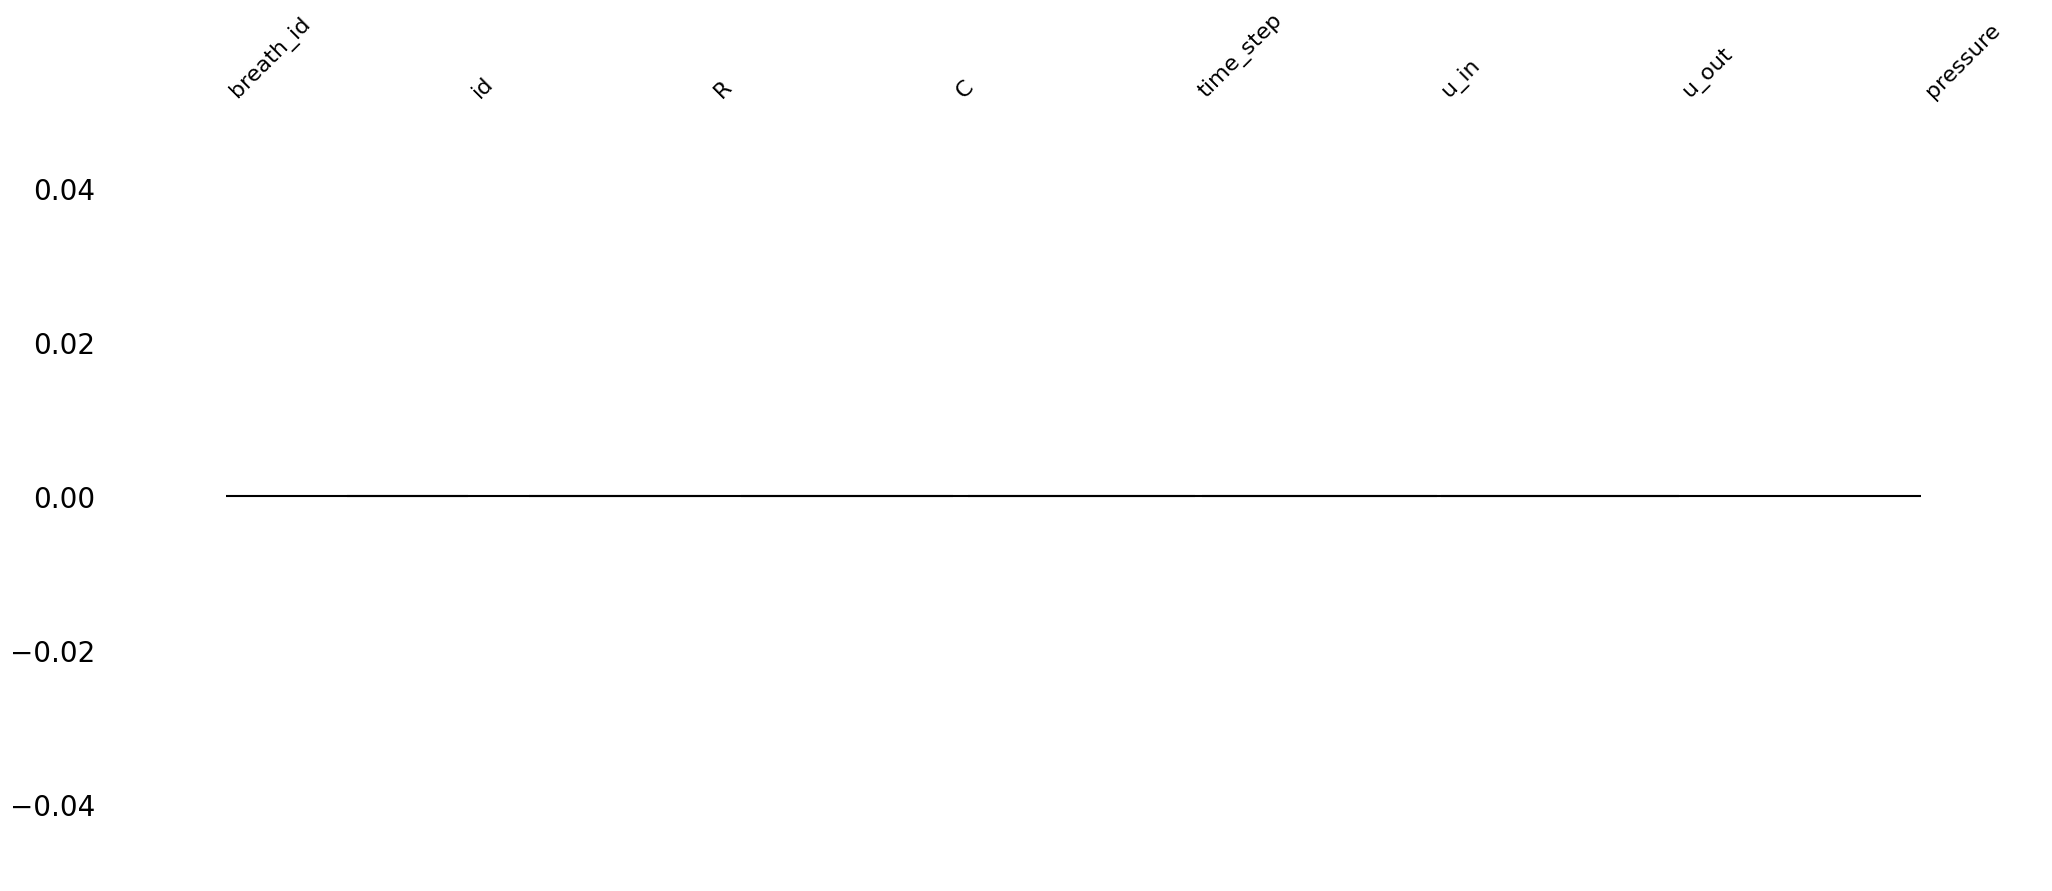

In [ ]:
# Dendrogram showing the distribution of Train Dataset missing values
msno.dendrogram(data_train)

<Axes: >

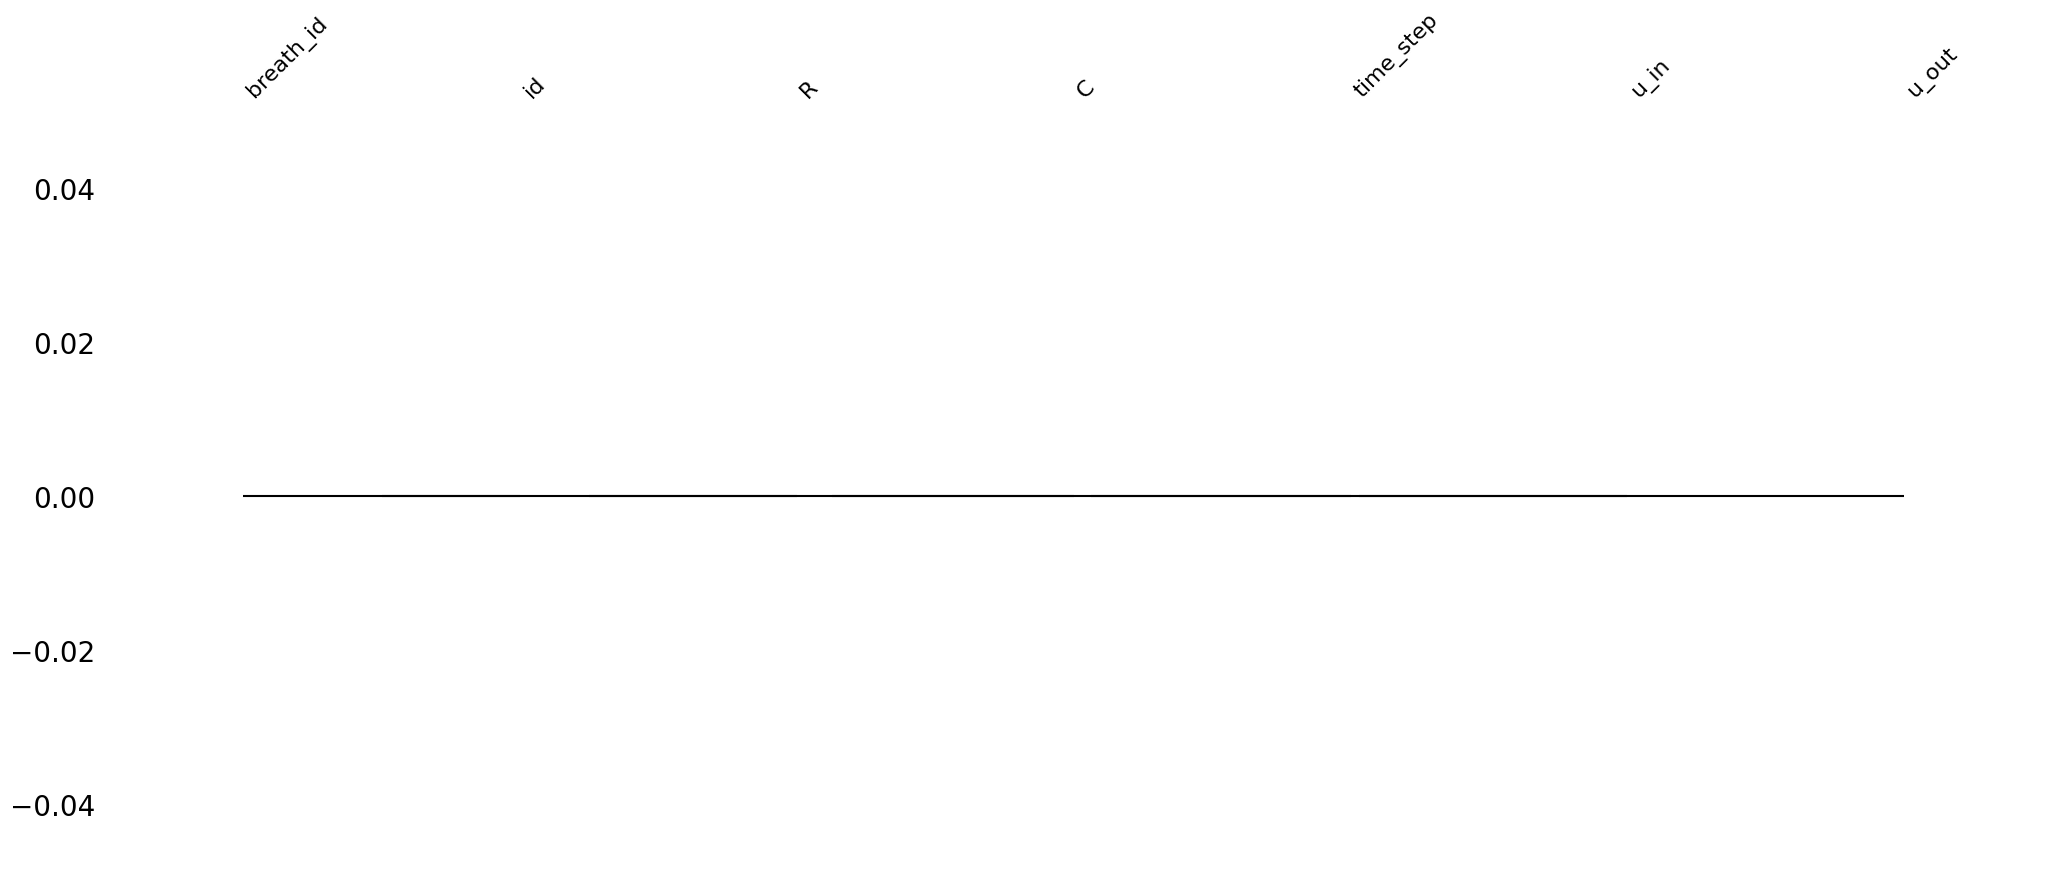

In [ ]:
# Dendrogram showing the distribution of Test Dataset missing values
msno.dendrogram(data_test)

No missing values in both train and test data sets.

# Checking Duplicate Records in Train and Test Data 

In [ ]:
# Check for duplicate values in the train dataset
dup_train = data_train.duplicated()

# Print duplicate values in the train dataset
print('Total no of duplicate values in Training Dataset = %d' % (dup_train.sum()))

Total no of duplicate values in Training Dataset = 0


In [ ]:
# Check for duplicate values in the train dataset
dup_test = data_test.duplicated()

# Print duplicate values in the train dataset
print('Total no of duplicate values in Testing Dataset = %d' % (dup_test.sum()))

Total no of duplicate values in Testing Dataset = 0


It is found to be no Duplicate records in Train and Test Data

#MAPE Function to caluclate Mean Absolute Percentage Error

In [ ]:
# Define a function to computes the mean absolute percentage error (MAPE)
def mape(actual, pred): 

    # Convert the actual and predicted values to NumPy arrays
    actual, pred = np.array(actual), np.array(pred)

    # Compute the mean absolute percentage error
    return np.mean(np.abs((actual - pred) / actual)) * 100

# Exploratory Data Analysis

In [ ]:
# Create a copy of train dataset
DF_train = data_train.copy()

# Dropping the columns
DF_train.drop(['id', 'breath_id'], axis = 1, inplace = True)

In [ ]:
# print the head of DF_train dataset
DF_train.head()

R   C  time_step       u_in  u_out   pressure
0  20  50   0.000000   0.083334      0   5.837492
1  20  50   0.033652  18.383041      0   5.907794
2  20  50   0.067514  22.509278      0   7.876254
3  20  50   0.101542  22.808822      0  11.742872
4  20  50   0.135756  25.355850      0  12.234987

<Axes: >

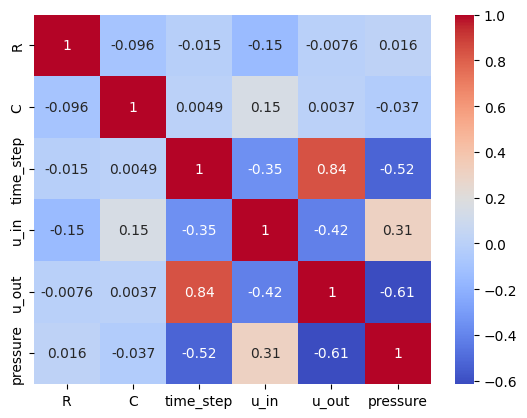

In [ ]:
# Create a heatmap to show correlation of DF_train columns
corr = DF_train.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

##Box Plots

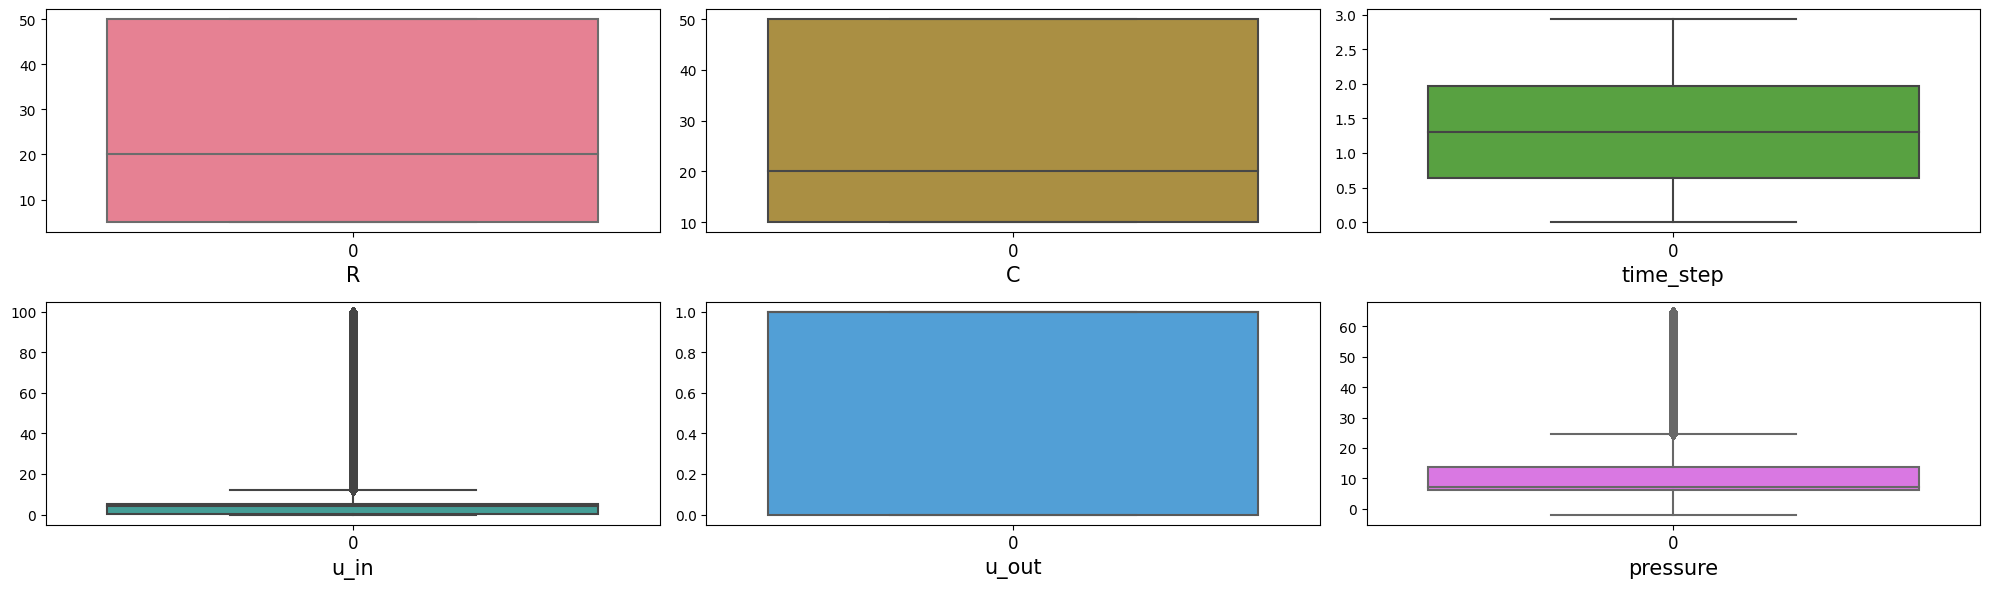

In [ ]:
# Define the number the rows and columns in the subplot 
n_rows,n_columns,pos = 2,3,1

# Generate a list of 6 colors from the "husl" color palette
colors = sns.color_palette("husl", 6)

plt.figure(figsize=(20, 6))
for i, col in enumerate(DF_train.columns):
    plt.subplot(n_rows, n_columns,pos)
    sns.boxplot(DF_train[col], color=colors[i])
    plt.xlabel('{}'.format(col), fontsize=15)
    plt.xticks(fontsize=12)
    
    pos += 1

plt.tight_layout()

**Box Plot for all features :**

**R :** Values lies in the range of 10 to 50

**C :** Values lies in the range of 10 to 50

**time_step :** Values lies in the range of 0.6 to 2.0

**u_in :** Values lies in the range of 0 to 8

**u_out :** Values lies in the range of 0 to 1

**pressure  :** Values lies in the range of 8 to 15


In [ ]:
#Value Counts
data_train.time_step.value_counts()

0.000000    75450
0.031934       46
0.031935       44
0.031920       43
0.031938       43
            ...  
1.793088        1
1.827272        1
1.896594        1
1.930891        1
2.638017        1
Name: time_step, Length: 3767571, dtype: int64

In [ ]:
#Count of unique breath_id
unique_breaths = len(data_train.breath_id.unique())
print("No of Breaths:", unique_breaths)

#Count of Breath_id = 1
breath_length = data_train.groupby('breath_id').C.count().unique()
if len(breath_length) == 1:
    breath_length = breath_length[0]
print("Breath Length:", breath_length)

No of Breaths: 75450
Breath Length: 80


In [ ]:
#Varience of Airway Resistance & Respiratory Compliance
r_c_variance = data_train.groupby('breath_id')[['R','C']].var()
r_c_variance

R    C
breath_id          
1          0.0  0.0
2          0.0  0.0
3          0.0  0.0
4          0.0  0.0
5          0.0  0.0
...        ...  ...
125740     0.0  0.0
125742     0.0  0.0
125743     0.0  0.0
125745     0.0  0.0
125749     0.0  0.0

[75450 rows x 2 columns]

In [ ]:
# Extract the mean resistance value for each breath and store in R_value
R_value = data_train[['breath_id', 'R']].groupby('breath_id').mean()['R']

# Print the counts of unique change in pressure per change in air flow
print('Unique change in pressure per change in air flow:')
print(R_value.value_counts())

# Sort the unique values of R and convert to integer data type
R = np.sort(R_value.unique()).astype(int)

Unique change in pressure per change in air flow:
50.0    30126
5.0     24860
20.0    20464
Name: R, dtype: int64


In [ ]:
# Compute the average value of the column 'C' for each breath_id using groupby() and store it in C_value
C_value = data_train[['breath_id', 'C']].groupby('breath_id').mean()['C']   
print('Change in volume per change in pressure:')
# Compute the frequency count of unique values in C_value and print it
print(C_value.value_counts())   
# Get the unique values from C_value, sort them in ascending order, and convert them to integers before storing them in C
C = np.sort(C_value.unique()).astype(int)   


Change in volume per change in pressure:
10.0    28059
50.0    24646
20.0    22745
Name: C, dtype: int64


In [ ]:
# Create an array to store unique combinations of R and C and their corresponding count
rc_values = np.array([
    [r, c, len(data_train[(data_train['R'] == r) & (data_train['C'] == c)]) // breath_length] 
    for r in R 
    for c in C
])

# Create a list of labels for the x-axis by concatenating R and C values
x = [str(r) + '_' + str(c) for r, c in rc_values[:,:2]]

# Create a list of y-axis values for the corresponding count of each unique combination of R and C
y = rc_values[:,2]

# Generate a list of colors for the plot
colors = ['blue']*len(x)

# Create a plotly bar plot with x and y values and color set to blue
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y, marker=dict(color=colors)))

# Set the plot title and axis labels
fig.update_layout(
    title='Number Counts by R_C',
    xaxis_title='Airway Resistance_Respiratory Compliance',
    yaxis_title='Count'
)

# Show the plot
fig.show()


In [ ]:
#Histplot of Pressure Distribution
sns.histplot(DF_train['pressure'], kde=True)
plt.title('Distribution of Pressure')
plt.show()

In [ ]:
# Create a new plotly figure
fig = go.Figure()

# Add a line plot for pressure data with first 80 data points
fig.add_trace(go.Scatter(x=data_train.index[:80], y=data_train.pressure[:80], name='Pressure'))

# Add a line plot for u_in data with first 80 data points
fig.add_trace(go.Scatter(x=data_train.index[:80], y=data_train.u_in[:80], name='u_in'))

# Add a line plot for u_out data with first 80 data points
fig.add_trace(go.Scatter(x=data_train.index[:80], y=data_train.u_out[:80], name='u_out'))

# Update layout with title and axis labels
fig.update_layout(
    title='Comparison of Pressure & u_in & u_out',
    xaxis_title='Time',
    yaxis_title='Values'
)

# Display the plot
fig.show()


In [ ]:
#Create a data_train copy into dataTrn
dataTrn = data_train.copy()
#Drop the id, breath_id, R,C, time_step columns
dataTrn.drop(columns=['id', 'breath_id', 'R', 'C', 'time_step'], axis = 1, inplace = True)

In [ ]:
#Drop Pressure variable
X = dataTrn.drop(columns='pressure')
X = X[:80000]
y = dataTrn['pressure']
y = y[:80000]

In [ ]:
# Split data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

# Print dimensions of the training and validation sets
print('Dimension of X_train:', X_train.shape,'\nDimension of X_validation:', X_validation.shape,
      '\nDimension of y_train:', y_train.shape,'\nDimension of y_validation:', y_validation.shape)

Dimension of X_train: (56000, 2) 
Dimension of X_validation: (24000, 2) 
Dimension of y_train: (56000,) 
Dimension of y_validation: (24000,)


#Predictive Modelling

# Linear Regression Model

*   Linear Regression is a type of supervised learning algorithm used for solving regression problems, i.e., problems where the output variable is a continuous value, as in your case where the output variable is the pressure in the ventilator system.
*   Linear Regression to build a model that can predict the pressure in the ventilator system based on the values of the input features such as **R, C, time_step, u_in, and u_out**. Data is split into training and testing sets, fit the model on the training set, and evaluate the performance on the testing set using metrics such as R-squared score and Mean Absolute Percentage Error (MAPE score).



In [ ]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR_train_predict = LR_model.predict(X_train)
LR_validation_predict = LR_model.predict(X_validation)

In [ ]:
LR_R2_train = r2_score(y_train,LR_train_predict)
LR_R2_validation = r2_score(y_validation,LR_validation_predict)

LR_MAPE_train = mape(y_train,LR_train_predict)
LR_MAPE_validation = mape(y_validation,LR_validation_predict)

In [ ]:
resultsLR = pd.DataFrame({'R Squared Score': LR_R2_validation,
                          'MAPE Score':LR_MAPE_validation }
                           ,index=['Linear Regression'])

resultsLR

R Squared Score  MAPE Score
Linear Regression         0.380519   37.565245

Based on the R squared score of 0.38 and the MAPE score of 37.56, it can be concluded that the linear regression model performed moderately in predicting the pressure in the ventilator system.

# Random Forest Regressor

*   Random Forest Regressor is a machine learning algorithm that uses an ensemble of decision trees to make predictions. In your project, Random Forest Regressor can be used to predict the pressure values based on the given features. The algorithm creates a multitude of decision trees at random, and each tree is trained on a different subset of the data. The results from all the trees are then combined to make the final prediction. This method helps to reduce overfitting and increase the accuracy of the predictions.
*   Random Forest Regressor is particularly effective in handling high-dimensional datasets and dealing with missing values. It can also handle both categorical and continuous data, which makes it a versatile algorithm for your project. 
*   The performance of the Random Forest Regressor can be evaluated using metrics such as R-squared and MAPE scores.





In [ ]:
RF_model=RandomForestRegressor(n_estimators = 501, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=501, random_state=0)

In [ ]:
RF_train_predict = RF_model.predict(X_train)
RF_validation_predict = RF_model.predict(X_validation)

In [ ]:
RF_R2_train = r2_score(y_train,RF_train_predict)
RF_R2_validation = r2_score(y_validation,RF_validation_predict)

RF_MAPE_train = mape(y_train,RF_train_predict)
RF_MAPE_validation = mape(y_validation,RF_validation_predict)

In [ ]:
resultsRF = pd.DataFrame({'R Squared Score': RF_R2_validation,
                          'MAPE Score':RF_MAPE_validation }
                           ,index=['Random Forest'])

results3 = pd.concat([resultsLR,resultsRF])
results3

R Squared Score  MAPE Score
Linear Regression         0.380519   37.565245
Random Forest             0.295020   36.808463

The Random Forest algorithm has the lowest R squared score of 0.29 and a MAPE score of 36.80, indicating that it is not as effective in predicting pressure in terms of R squared values as compared to Linear Regression model. MAPE got imporved from Linear Regression to Random Forest. Althogh Random Forest is also performed moderatly.

# XGBoost Model

*   XGBoost is a powerful machine learning algorithm that is widely used for regression problems like yours. It uses a gradient boosting framework to build a predictive model by combining multiple decision trees. The algorithm aims to minimize the loss function of the objective, which is the sum of the errors made by the model on the training data.
*   Here also in this model we are going to use R - square score and MAPE score to evaluate the performance of this model.



In [ ]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
XGB_train_predict = XGB_model.predict(X_train)
XGB_validation_predict = XGB_model.predict(X_validation)

In [ ]:
XGB_R2_train = r2_score(y_train,XGB_train_predict)
XGB_R2_validation = r2_score(y_validation,XGB_validation_predict)

XGB_MAPE_train = mape(y_train,XGB_train_predict)
XGB_MAPE_validation = mape(y_validation,XGB_validation_predict)

In [ ]:
resultsXGB = pd.DataFrame({'R Squared Score': XGB_R2_validation,
                          'MAPE Score':XGB_MAPE_validation }
                           ,index=['XGBoost Regressor'])

results4 = pd.concat([results3, resultsXGB])
results4

R Squared Score  MAPE Score
Linear Regression         0.380519   37.565245
Random Forest             0.295020   36.808463
XGBoost Regressor         0.434098   34.270919

XGBoost has produced a R squared score of 0.43 and an MAPE score of 34.27, indicating that it is able to explain 43% of the variance in your target variable and has an average percentage error of 34.27% in its predictions.

Based on the R Squared and MAPE scores of the above three models (Linear Regression andRandom Forest), it appears that XGBoost has the highest R Squared score and the lowest MAPE score, indicating that it is performing better than the other two models in predicting the pressure.

# Light Gradient Boosted Machine

*   LGBMRegressor (Light Gradient Boosting Machine Regressor) is a type of machine learning model that uses a gradient boosting algorithm to make predictions. It is a powerful model that is capable of capturing complex relationships between the features and the target variable.
*   LGBMRegressor works by constructing an ensemble of weak decision tree models. It learns the patterns in the data by minimizing a loss function that measures the difference between the predicted values and the actual values. In each iteration, the model fits the residuals (i.e., the difference between the predicted values and the actual values) with a new decision tree. This process continues until the model reaches a pre-specified number of trees or a pre-specified stopping criteria is met.
*  Here also we evaluate its performance on the testing set using metrics such as R-squared score and Mean Absolute Percentage Error (MAPE score).





In [ ]:
LGBMR_model = make_pipeline(StandardScaler(), LGBMRegressor(n_estimators=501))
LGBMR_model.fit(X_train, y_train)

LGBMR_train_predict = LGBMR_model.predict(X_train)
LGBMR_validation_predict = LGBMR_model.predict(X_validation)

In [ ]:
LGBMR_R2_train = r2_score(y_train,LGBMR_train_predict)
LGBMR_R2_validation = r2_score(y_validation,LGBMR_validation_predict)

In [ ]:
LGBMR_MAPE_train = mape(y_train,LGBMR_train_predict)
LGBMR_MAPE_validation = mape(y_validation,LGBMR_validation_predict)

In [ ]:

resultsLGBMR = pd.DataFrame({'R Squared Score': LGBMR_R2_validation,
                          'MAPE Score':LGBMR_MAPE_validation }
                           ,index=['Light Gradient Boosted Machine'])

In [ ]:
results2 = pd.concat([results4, resultsLGBMR])
results2

R Squared Score  MAPE Score
Linear Regression                      0.380519   37.565245
Random Forest                          0.295020   36.808463
XGBoost Regressor                      0.434098   34.270919
Light Gradient Boosted Machine         0.443025   34.115820


Based on the model outputs, it can be concluded that Light Gradient Boosted Machine (LGBM) outperformed Linear Regression model, Random Forest, XGBoost in terms of both R Squared score and MAPE score. LGBM model showed an R Squared score of 0.443 and an MAPE score of 34.12, Simply LGBM is improved from XGBoost for predicting pressure in the given dataset.

#Support Vector Regression

Support Vector Regression (SVR) is a supervised machine learning algorithm that is used for regression tasks. Some points about SVR are:

* It is based on the Support Vector Machine (SVM) algorithm for classification, but it is used for regression tasks.
* It uses a non-linear kernel to map the input data into a higher-dimensional space where it is easier to find a linear relationship between the input features and the output.
* The goal of SVR is to find a hyperplane that has the maximum margin from the data points while still allowing for a certain amount of error or "slack".
SVR can be used for both linear and non-linear regression tasks and can handle high-dimensional input data.
* The model parameters of SVR need to be tuned carefully, such as the choice of kernel, regularization parameter, and epsilon.
SVR is computationally efficient and can handle large datasets with good performance.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Create an instance of the SVR model
model = SVR(kernel='linear')

# Fit the model on the training data
model.fit(X_train, y_train)

SVR_train_predict = model.predict(X_train)
# Make predictions on the validation data
y_pred = model.predict(X_validation)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validation, y_pred)

print('MAE:', mae)

MAE: 3.8533323496253735


In [ ]:
# Calculate R-squared for training and validation sets using SVR
r2 = r2_score(y_validation, y_pred)
r2

0.3548678032020113

In [ ]:
def mape1(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
# Calculate MAPE for training and validation sets using SVR
SVR_MAPE_validation = mape1(y_validation, y_pred)
SVR_MAPE_validation

31.08274857540096

In [ ]:
resultsSVR = pd.DataFrame({'R Squared Score': r2,
                          'MAPE Score':SVR_MAPE_validation }
                           ,index=['Support Vector Regression'])

resultsSVR

R Squared Score  MAPE Score
Support Vector Regression         0.354868   31.082749

In [ ]:
results5 = pd.concat([results2, resultsSVR])
results5

R Squared Score  MAPE Score
Linear Regression                      0.380519   37.565245
Random Forest                          0.295020   36.808463
XGBoost Regressor                      0.434098   34.270919
Light Gradient Boosted Machine         0.443025   34.115820
Support Vector Regression              0.354868   31.082749

Based on the model outputs, it can be concluded that Support Vector Regression (SVR) outperformed Linear Regression model, Random Forest, XGBoost, Light Gradient Boost in terms of MAPE metric. LGBM model outperformed in terms od R Squared score of 0.443, WE obtained that SVR is the best model out of these 5 models.

#Neural Networks

#MLP Model
commonly used in deep learning. Here are some points on MLP:

* MLP is a feedforward neural network, meaning that information flows in only one direction, from the input layer to the output layer.

* It consists of one or more hidden layers, each of which is made up of multiple neurons that process information from the previous layer.

* MLP is often used for classification and regression tasks, and it can handle both continuous and categorical data.

* MLP uses backpropagation to update the weights of the neurons during the training process.

* MLP can suffer from overfitting, which occurs when the model becomes too complex and starts to fit the noise in the data instead of the underlying patterns.

* To prevent overfitting, regularization techniques such as L1 and L2 regularization and dropout can be applied.

* MLP has many hyperparameters that need to be tuned, such as the number of hidden layers, the number of neurons in each layer, the activation functions, and the learning rate.

 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Define MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_absolute_percentage_error', optimizer='adam')

# Fit model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation),
                    epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# Predict on validation set
y_pred = model.predict(X_validation)

# Calculate MAPE
#mape = np.mean(np.abs((y_validation - y_pred) / y_validation)) * 100
MLP_Mape = mape(y_validation, y_pred)
print('MAPE: %.2f' % MLP_Mape)

Epoch 1/100
1750/1750 [==============================] - 6s 3ms/step - loss: 34.0469 - val_loss: 26.8680
Epoch 2/100
1750/1750 [==============================] - 8s 4ms/step - loss: 26.0754 - val_loss: 25.9187
Epoch 3/100
1750/1750 [==============================] - 7s 4ms/step - loss: 25.8252 - val_loss: 25.6838
Epoch 4/100
1750/1750 [==============================] - 9s 5ms/step - loss: 25.6683 - val_loss: 25.4980
Epoch 5/100
1750/1750 [==============================] - 5s 3ms/step - loss: 25.5795 - val_loss: 25.3817
Epoch 6/100
1750/1750 [==============================] - 6s 3ms/step - loss: 25.4754 - val_loss: 25.6025
Epoch 7/100
1750/1750 [==============================] - 8s 5ms/step - loss: 25.4327 - val_loss: 25.2713
Epoch 8/100
1750/1750 [==============================] - 10s 6ms/step - loss: 25.3632 - val_loss: 25.2430
Epoch 9/100
1750/1750 [==============================] - 6s 3ms/step - loss: 25.3182 - val_loss: 25.6170
Epoch 10/100
1750/1750 [==============================

In [ ]:
#R2 for MLP
from sklearn.metrics import r2_score

# Predict on validation set
y_pred = model.predict(X_validation)

# Calculate R2 score for train and validation sets
MLP_R2_train = r2_score(y_train, model.predict(X_train))
MLP_R2_validation = r2_score(y_validation, y_pred)

print('R2 score for training set: %.2f' % MLP_R2_train)
print('R2 score for validation set: %.2f' % MLP_R2_validation)

1750/1750 [==============================] - 3s 2ms/step
R2 score for training set: 0.18
R2 score for validation set: 0.17


In [ ]:
resultsMLP = pd.DataFrame({'R Squared Score': MLP_R2_validation,
                          'MAPE Score': MLP_Mape }
                           ,index=['Light Gradient Boosted Machine'])

R sqaured value for MLP is 0.17 and MAPE as 45.73. Hence it is clear that this model is not good fit for this data.

#Summary:

* Two metrics has considered for choosing best model out of Linear Regression, Random Forest, XGBoost, Light Gradient Boosted Regressor, Support Vector Regression and Multi Layered Perceptron is R Squared metric and MAPE Metric.

* Light Gradient Boosted Regressor has highest R squared value from other models.

* SVR outperformed with MAPE metric by reducing the Mean Absolute percentage error from 37.5 to 31.08 by 6.5%.

#References

1. Kaggle. (2021). Mechanical Ventilator Pressure Prediction. Retrieved from https://www.kaggle.com/competitions/ventilator-pressure-prediction

2. Cleveland Clinic. (n.d.). Mechanical ventilation. Retrieved from https://my.clevelandclinic.org/health/treatments/15368-mechanical-ventilation#:~:text=Mechanical%20ventilation%20is%20a%20type,oxygen%20and%20removes%20carbon%20dioxide.